In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm

import os

In [2]:
strains = ["DSM", "MS001", "MS008", "MS014"]
species = ['CA', 'BT', 'BU', 'BV', 'CS', 'CD', 'DP', 'CH']

In [3]:
df = pd.read_csv("DSM.csv")
df

Param name  Param value  Param stdv  Param p-value        CA        BT  \
0          CA     0.175002    0.021122   1.178688e-16  0.000446 -0.000007   
1          BT     0.833766    0.038323  5.995481e-105 -0.000007  0.001469   
2          BU     0.692262    0.038831   4.303095e-71  0.000013  0.000780   
3          BV     0.843851    0.052910   2.906357e-57 -0.000196  0.000442   
4          CS     0.480222    0.019231  1.260660e-137  0.000007  0.000091   
..        ...          ...         ...            ...       ...       ...   
67      CH*BV     0.067218    0.089371   4.519799e-01  0.000020 -0.000069   
68      CH*CS    -0.090636    0.096026   3.452371e-01  0.000006  0.000027   
69      CH*CD    -0.621764    0.230901   7.086104e-03 -0.000022 -0.000253   
70      CH*DP    -0.298350    0.139116   3.198350e-02  0.000006 -0.000026   
71      CH*CH    -2.917980    0.343086   1.814348e-17  0.000045 -0.000626   

          BU        BV        CS            CD  ...     DP*DP     DP*CH  \
0   0.000013 -0.000196  0.000007 -9.845405e-07  ...  0.000001 -0.000053   
1   0.000780  0.000442  0.000091  5.481753e-05  ... -0.000115 -0.000104   
2   0.001508  0.000427  0.000117 -1.493551e-04  ... -0.000180 -0.000157   
3   0.000427  0.002799  0.000176  2.254872e-04  ... -0.000316  0.000024   
4   0.000117  0.000176  0.000370  6.316727e-05  ... -0.000099 -0.000166   
..       ...       ...       ...           ...  ...       ...       ...   
67 -0.000087 -0.000177  0.000001 -1.857030e-04  ... -0.000030 -0.000208   
68  0.000010  0.000031 -0.000041 -4.429485e-06  ... -0.000015  0.000101   
69 -0.000039  0.000003 -0.000086 -9.450799e-04  ... -0.000158  0.000505   
70 -0.000004  0.000022 -0.000022 -1.063491e-04  ... -0.000384 -0.003302   
71  0.001929 -0.002369 -0.000438 -3.580753e-03  ... -0.000925  0.001934   

       CH*CA     CH*BT     CH*BU     CH*BV     CH*CS     CH*CD     CH*DP  \
0  -0.000044  0.000007  0.000005  0.000020  0.000006 -0.000022  0.000006   
1   0.000078 -0.000024  0.000004 -0.000069  0.000027 -0.000253 -0.000026   
2  -0.000176  0.000172  0.000093 -0.000087  0.000010 -0.000039 -0.000004   
3  -0.000177 -0.000117 -0.000049 -0.000177  0.000031  0.000003  0.000022   
4  -0.000009 -0.000021 -0.000007  0.000001 -0.000041 -0.000086 -0.000022   
..       ...       ...       ...       ...       ...       ...       ...   
67 -0.002549  0.000582  0.000362  0.007987  0.000051  0.002089  0.000008   
68 -0.000887 -0.000062 -0.000083  0.000051  0.009221 -0.000130  0.000868   
69 -0.001527 -0.002333 -0.001352  0.002089 -0.000130  0.053315 -0.004974   
70  0.003291  0.000494 -0.000061  0.000008  0.000868 -0.004974  0.019353   
71 -0.015166  0.002307 -0.001740 -0.006967 -0.005772  0.003647 -0.008844   

       CH*CH  
0   0.000045  
1  -0.000626  
2   0.001929  
3  -0.002369  
4  -0.000438  
..       ...  
67 -0.006967  
68 -0.005772  
69  0.003647  
70 -0.008844  
71  0.117708  

[72 rows x 76 columns]

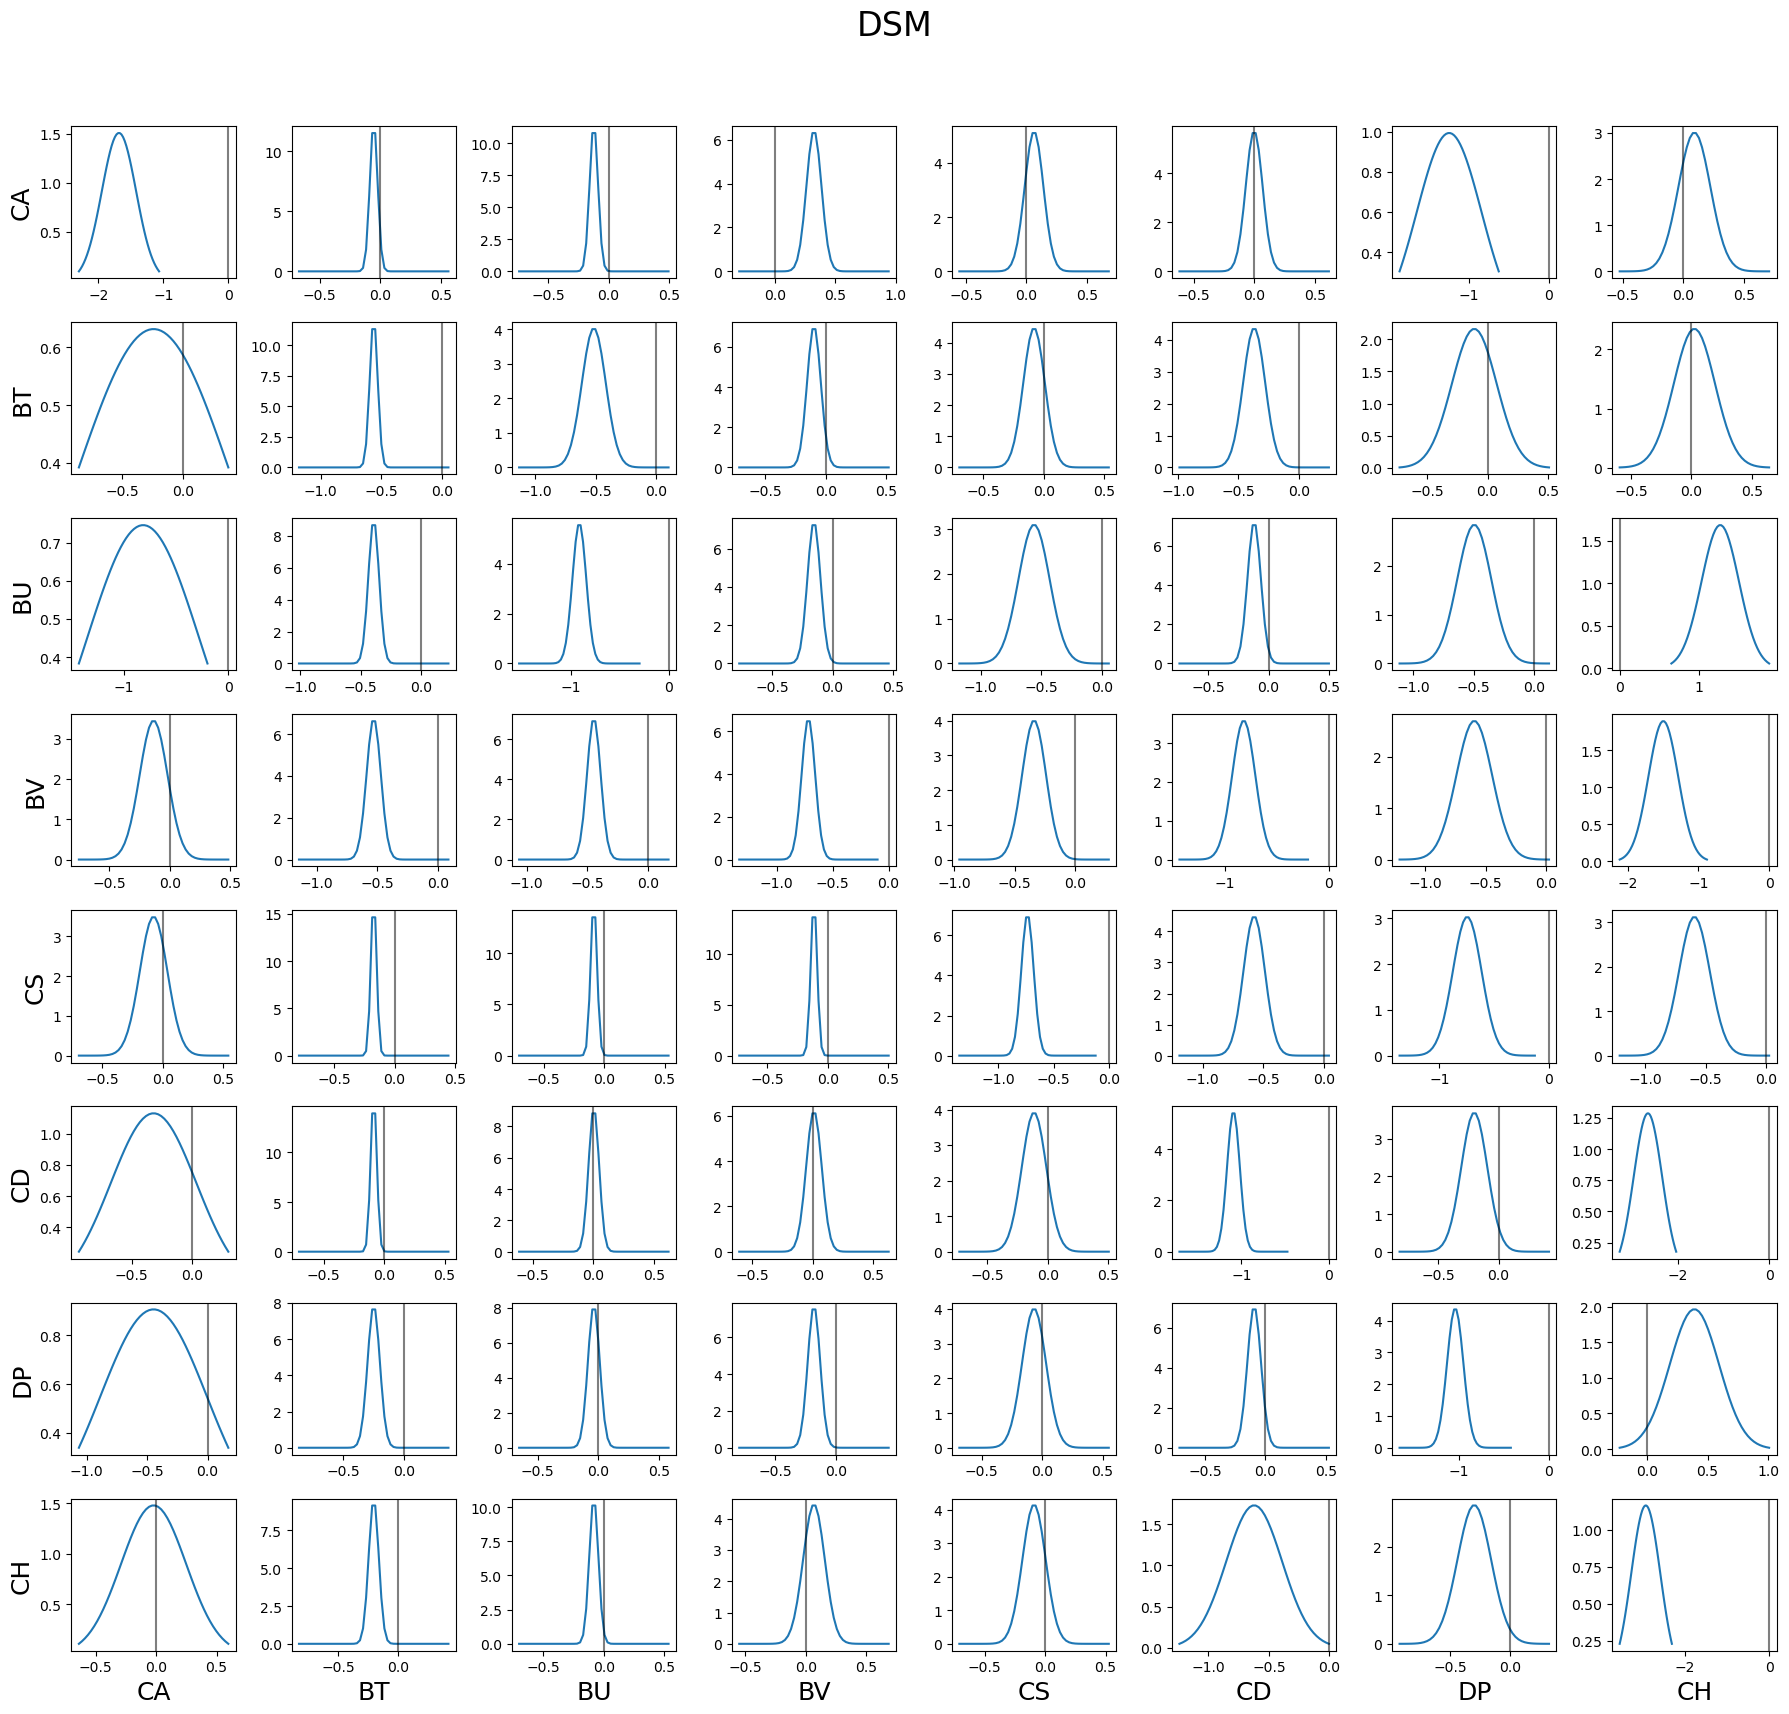

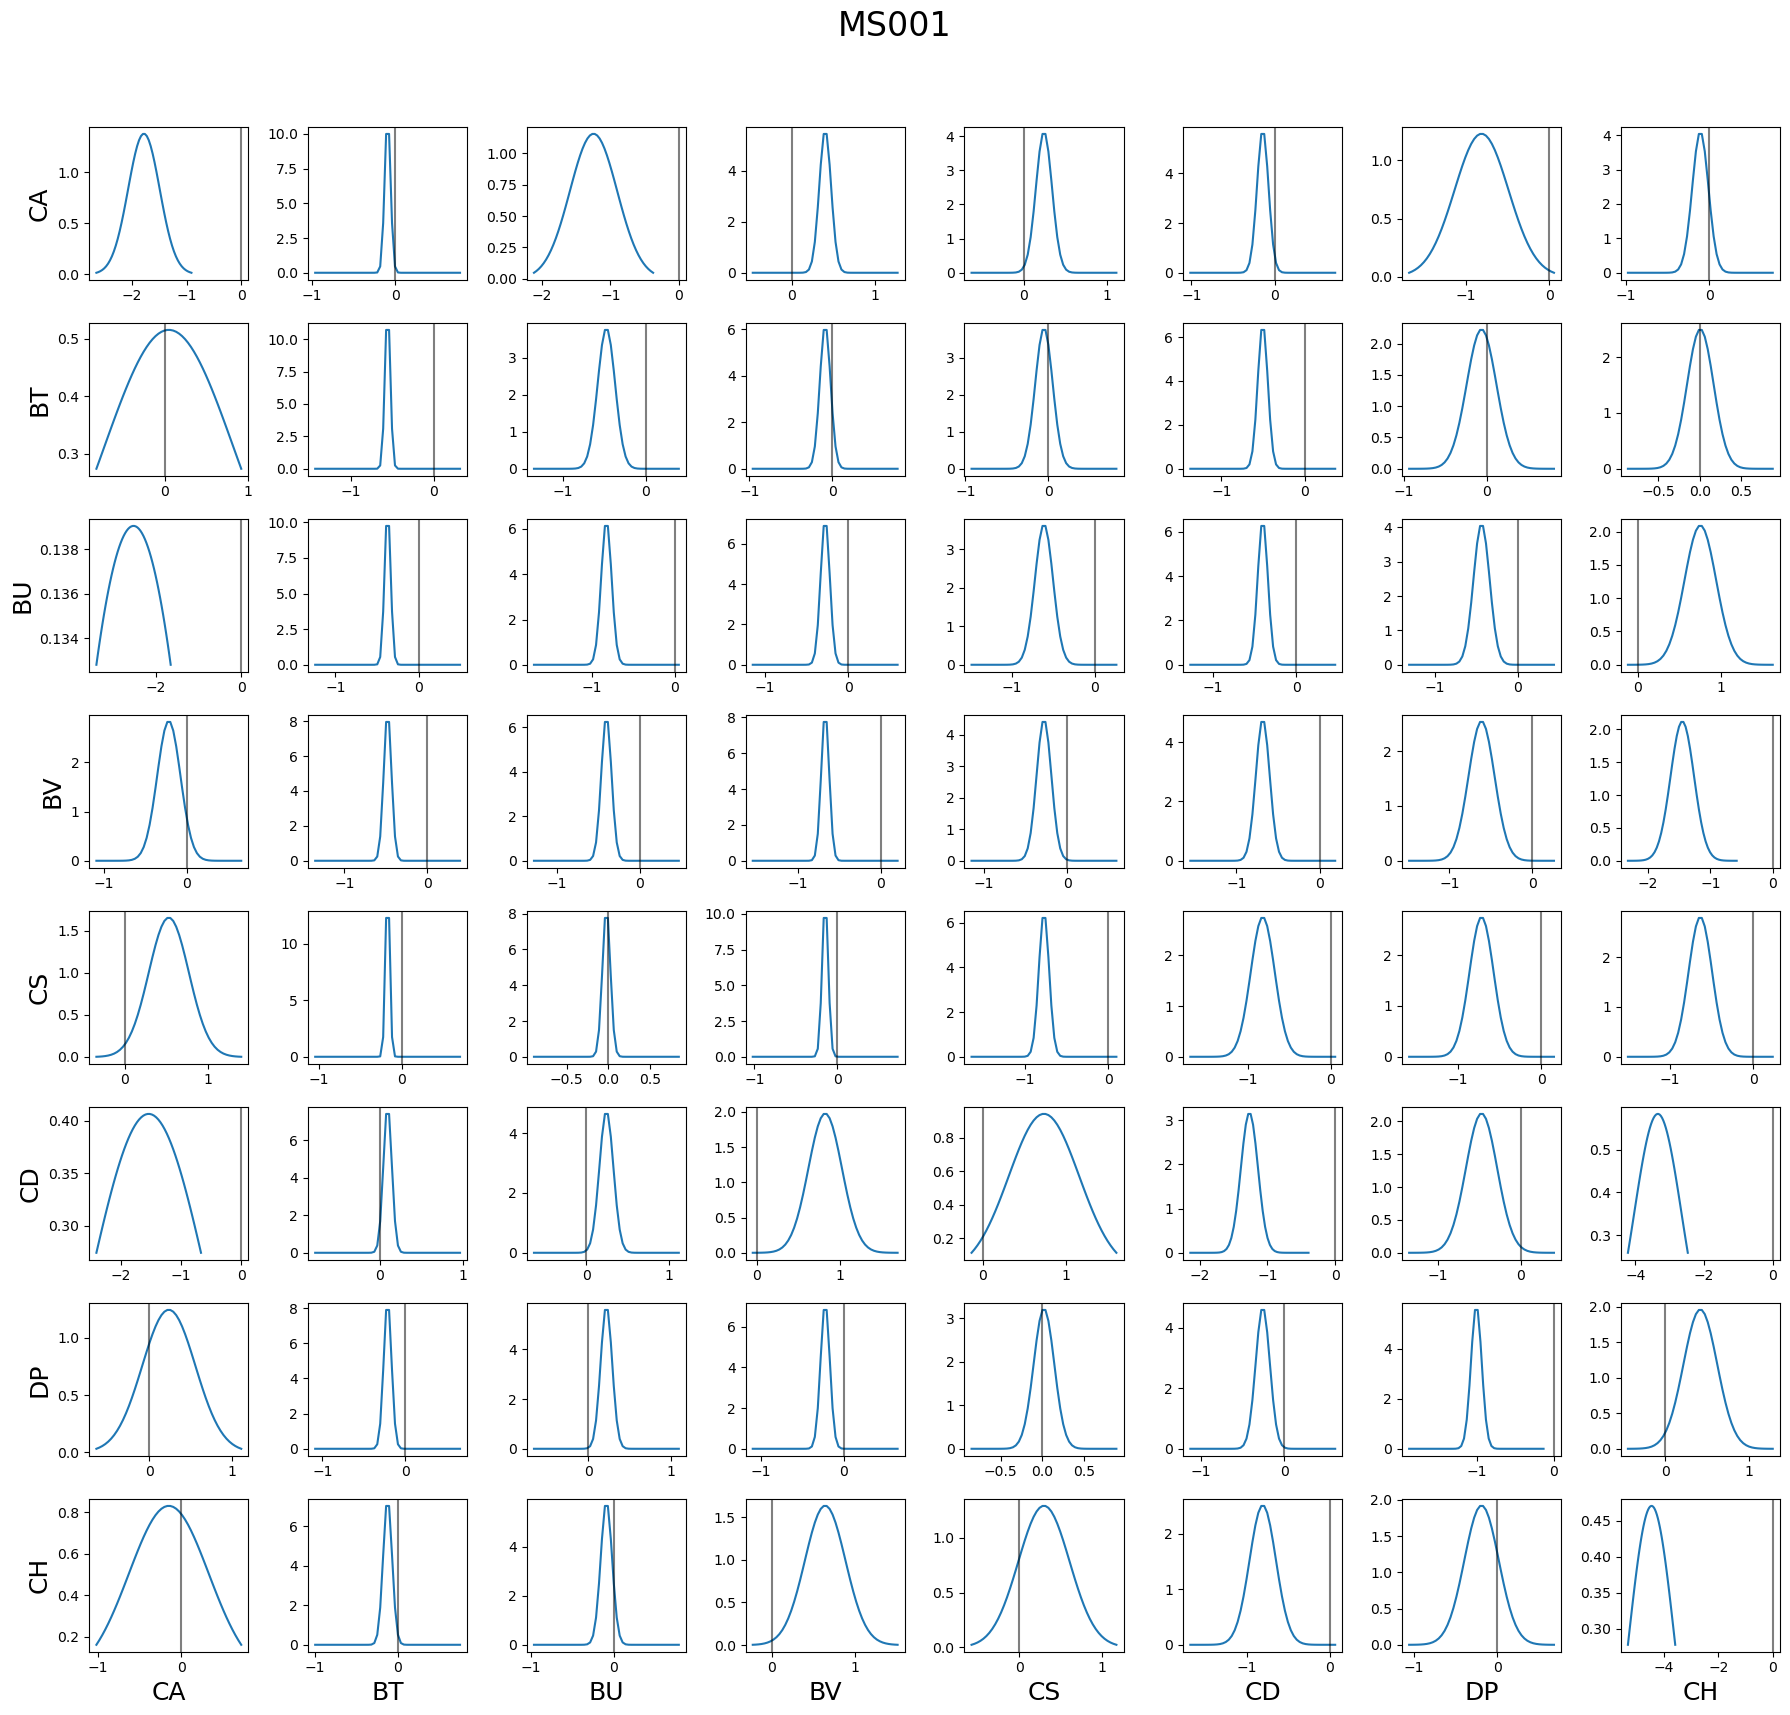

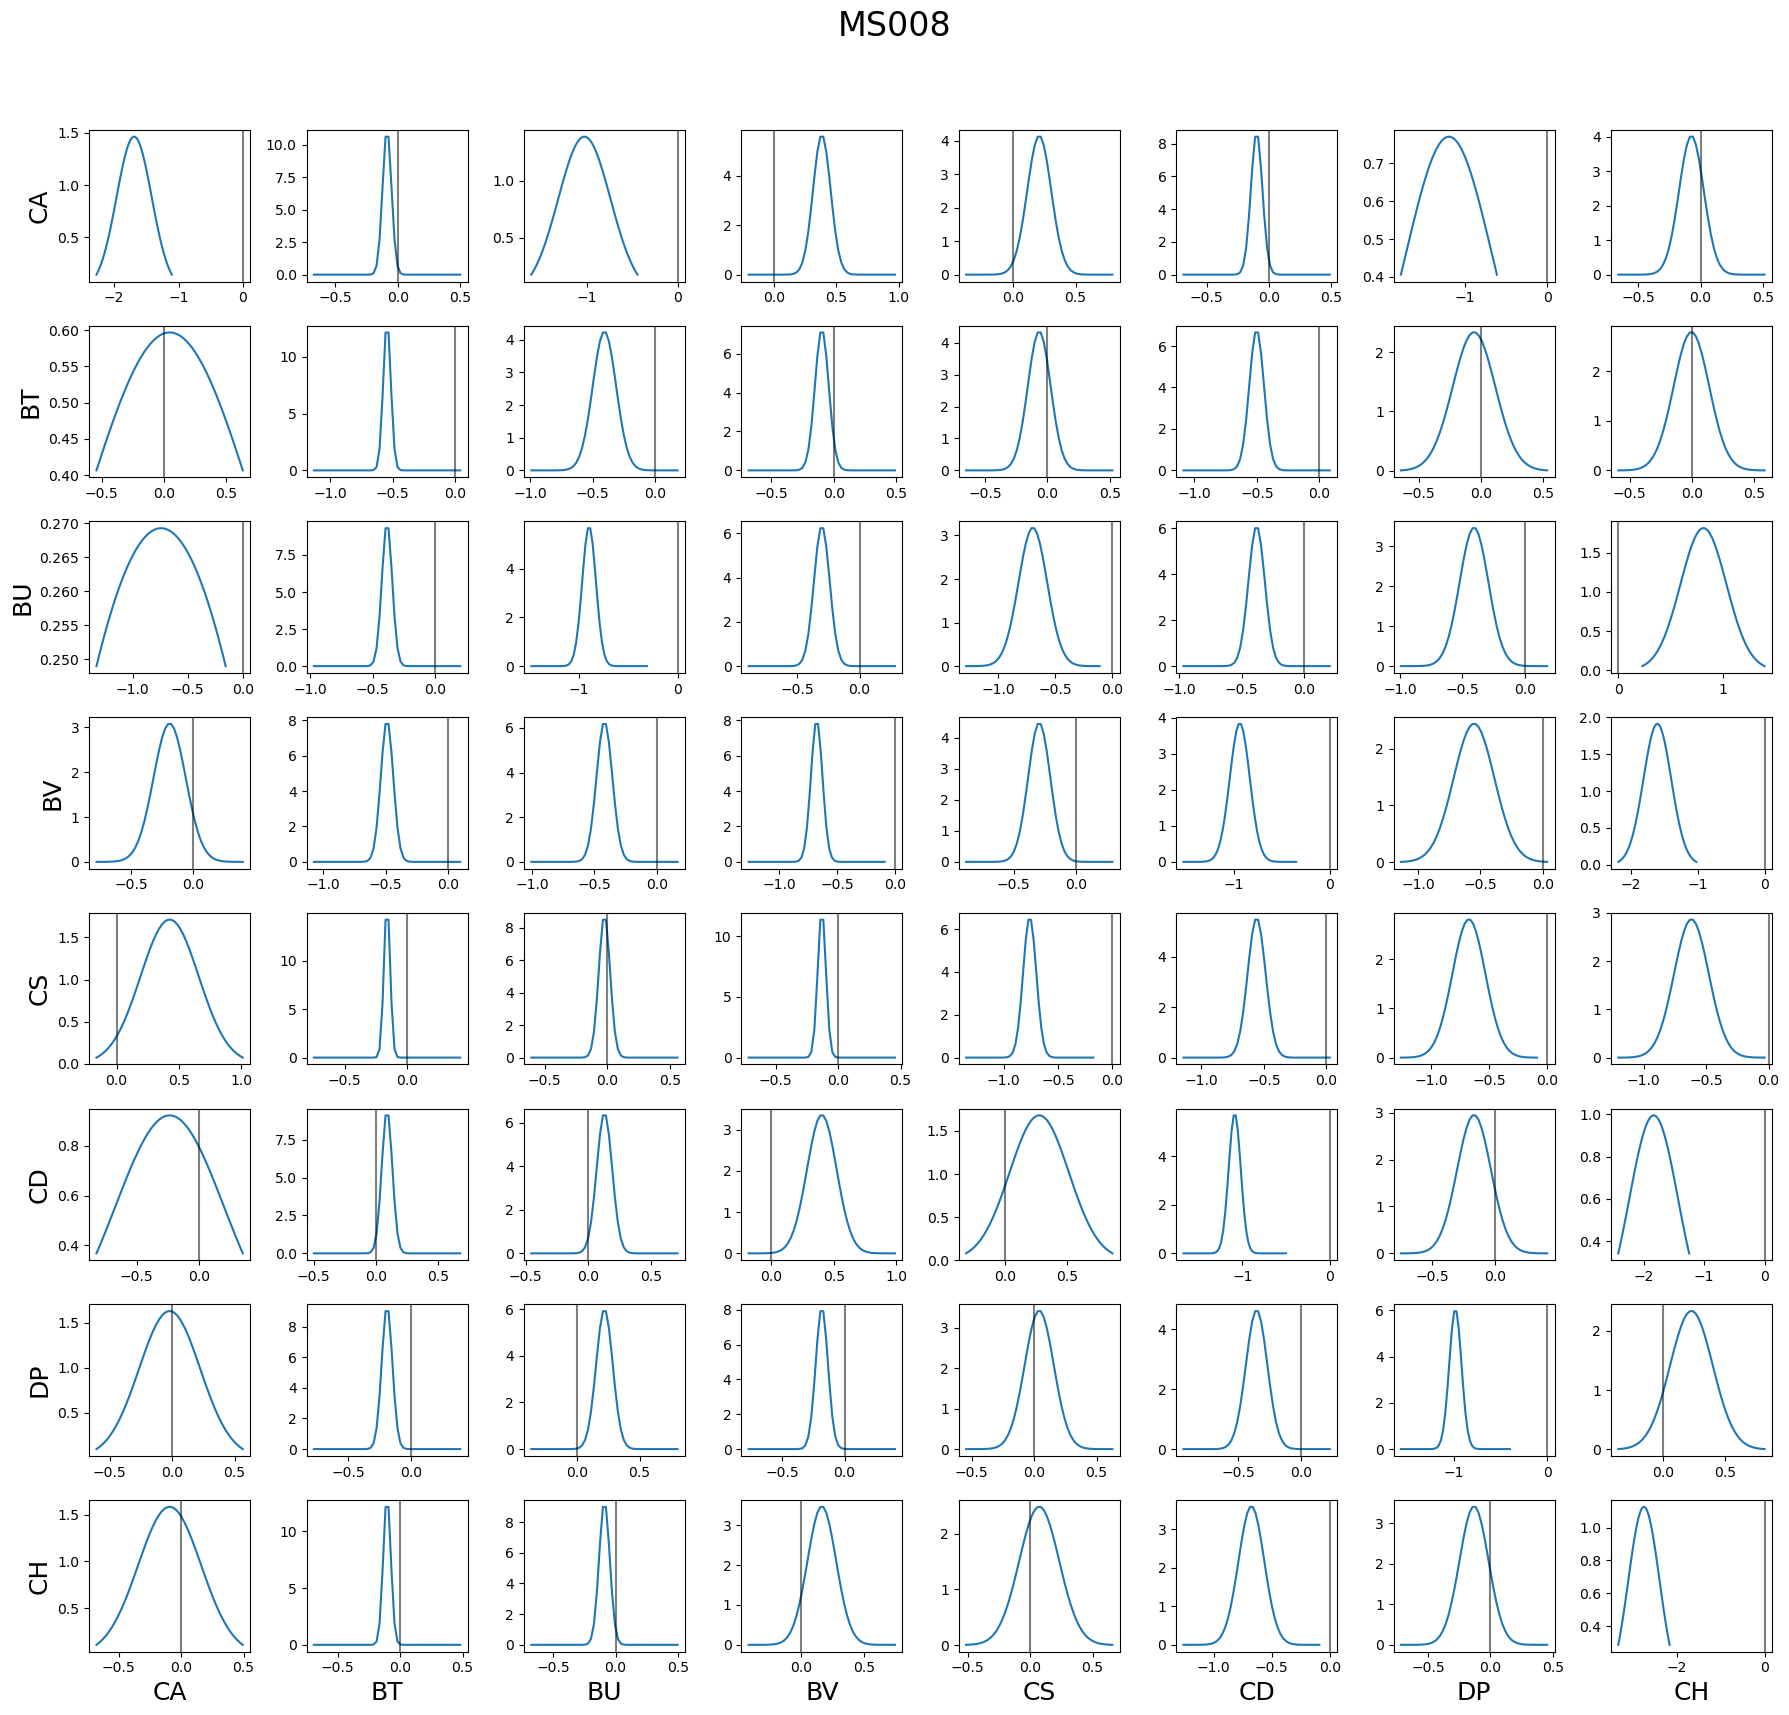

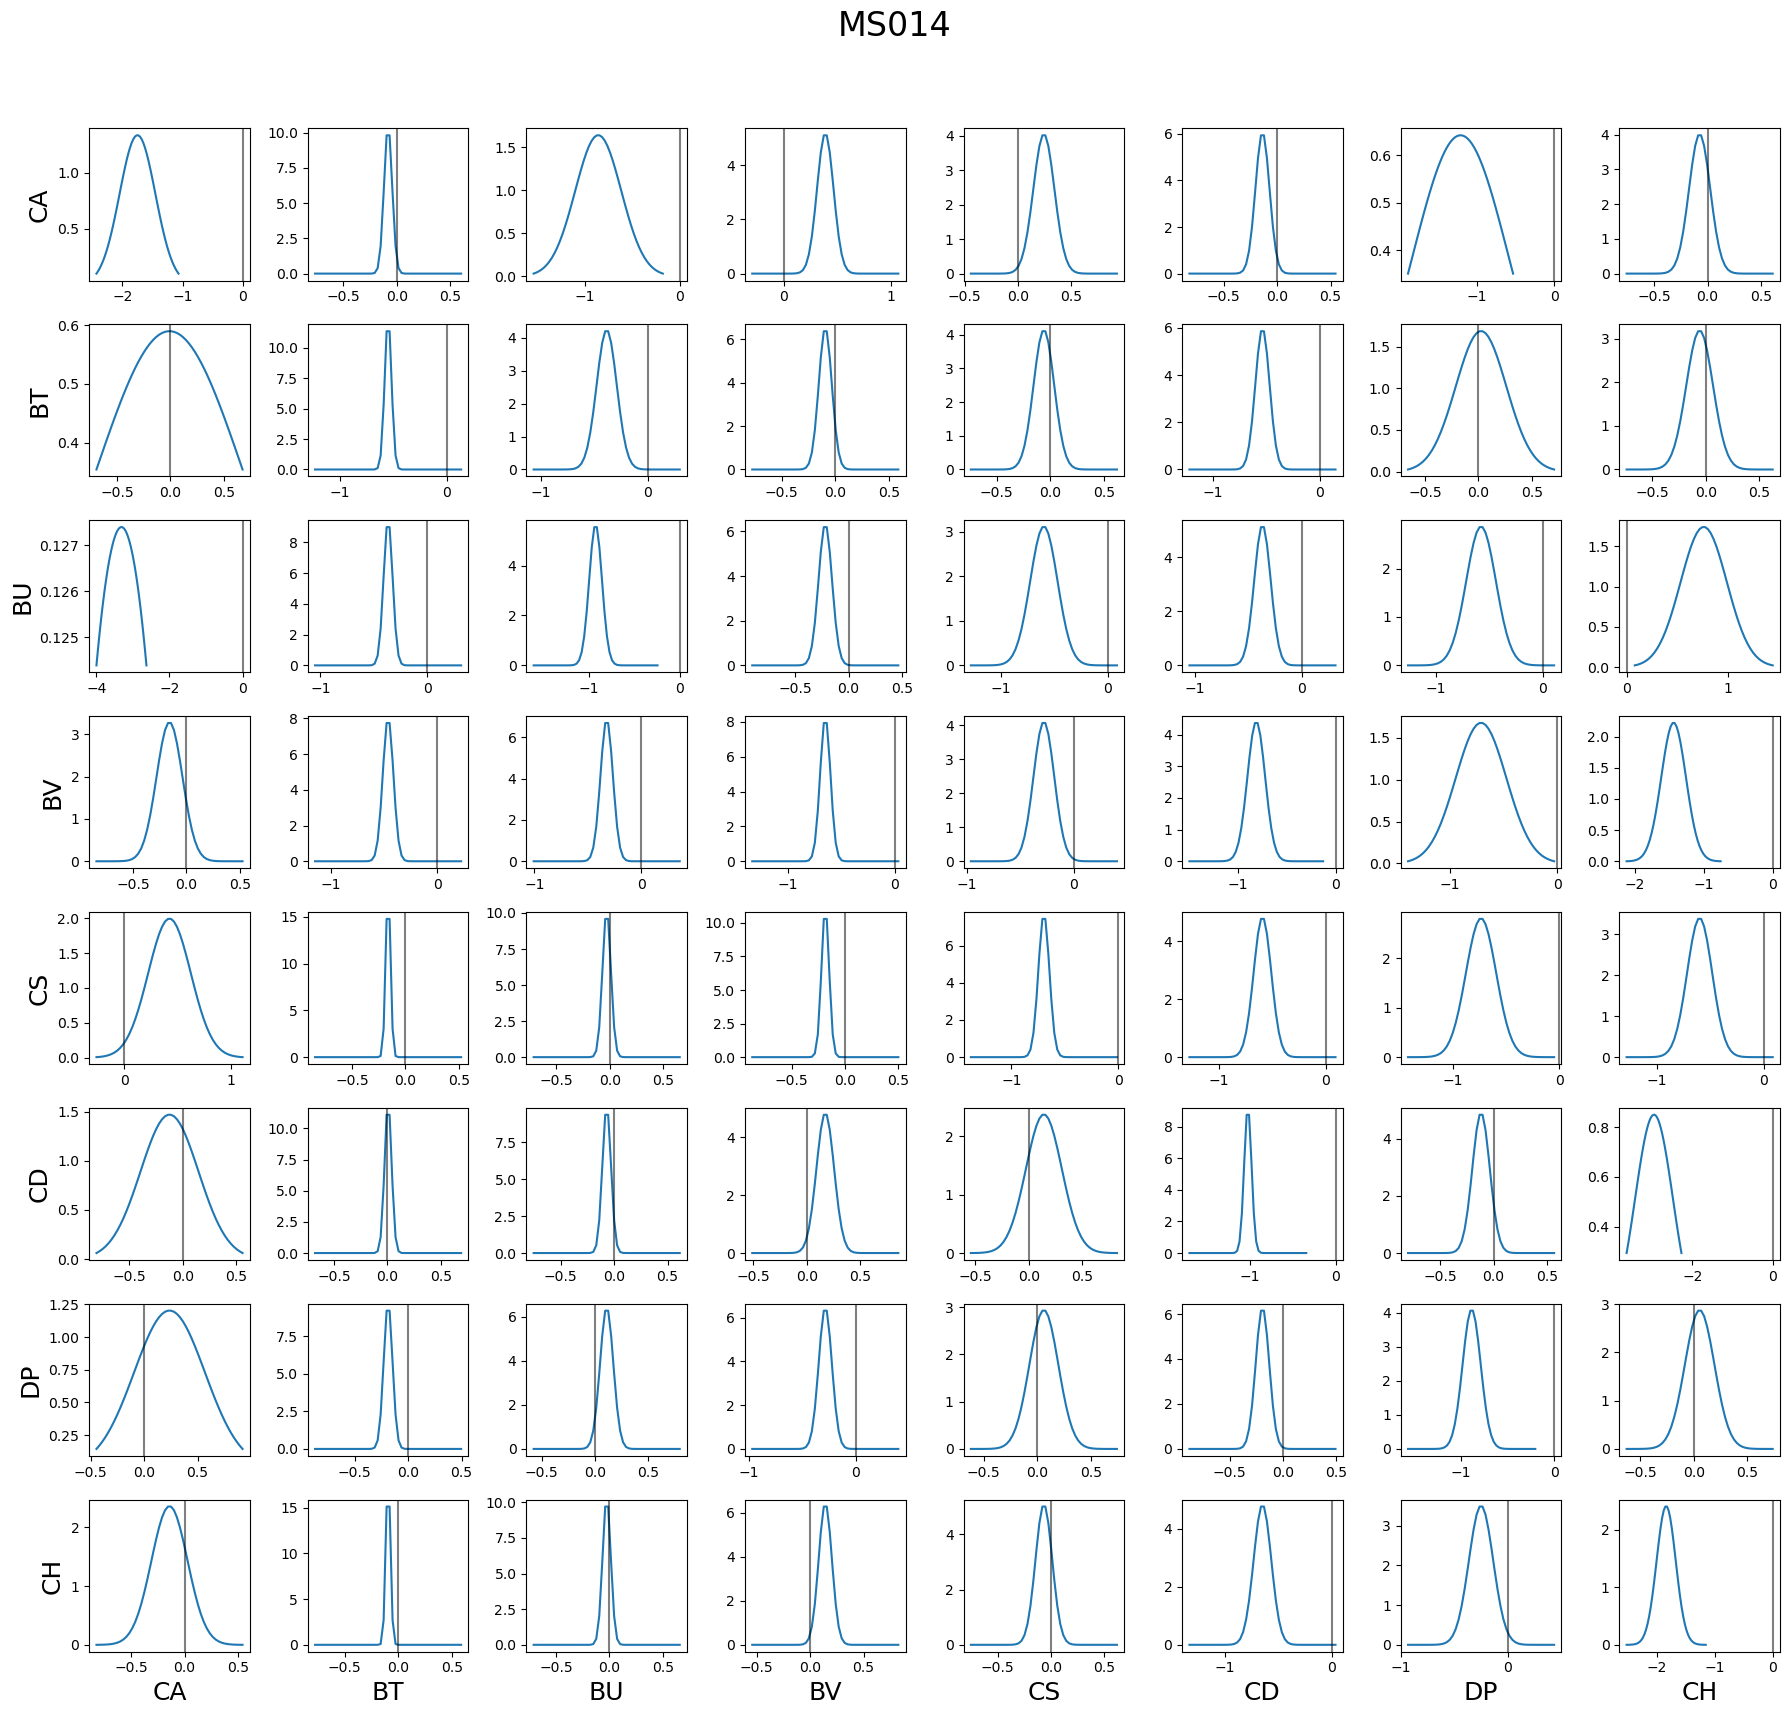

In [4]:
exp_names = []
for strain in strains:
    # import parameter values
    df = pd.read_csv(f"{strain}.csv")
    
    # plot parameter distribution
    n_species = len(species)
    Avec = df['Param value'].values[len(species):]
    Aij_std = df['Param stdv'].values[len(species):]

    plt.figure(figsize=(18,18))
    k = 0
    for i in range(n_species):
        for j in range(n_species):
            plt.subplot(n_species, n_species, k+1)
            left = Avec[k]-np.std(Avec)
            right = Avec[k]+np.std(Avec)
            a = np.linspace(left, right)
            plt.plot(a, norm.pdf(a,Avec[k],Aij_std[k]))
            plt.axvline(x=0, c='k', alpha=.5)
            k += 1
            if j == 0:
                plt.ylabel(species[i], fontsize=18)
            if i == n_species-1:
                plt.xlabel(species[j], fontsize=18)

    plt.suptitle(strain, fontsize=24)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig("../figures/"+strain+".pdf")
    plt.show()
    plt.close()